In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bc_df = pd.read_csv('Breast_Cancer.csv')
bc_df['Tumor Size'] = bc_df['Tumor Size']/10
bc_df['Survival Years'] = bc_df['Survival Months']/12
bc_df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival Years
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.4,Positive,Positive,24,1,60,Alive,5.000000
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,3.5,Positive,Positive,14,5,62,Alive,5.166667
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,6.3,Positive,Positive,14,7,75,Alive,6.250000
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,1.8,Positive,Positive,2,1,84,Alive,7.000000
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,4.1,Positive,Positive,3,1,50,Alive,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,0.9,Positive,Positive,1,1,49,Alive,4.083333
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,4.6,Positive,Positive,14,8,69,Alive,5.750000
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,2.2,Positive,Negative,11,3,69,Alive,5.750000
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,4.4,Positive,Positive,11,1,72,Alive,6.000000


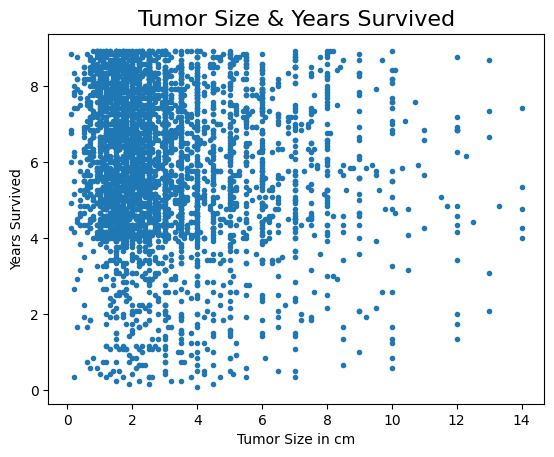

In [252]:
# Hypothesis 1.1
plt.scatter(bc_df['Tumor Size'],bc_df['Survival Years'],marker=".")
plt.xlabel('Tumor Size in cm')
plt.ylabel('Years Survived')
plt.title("Tumor Size & Years Survived", fontsize=16)
plt.show()

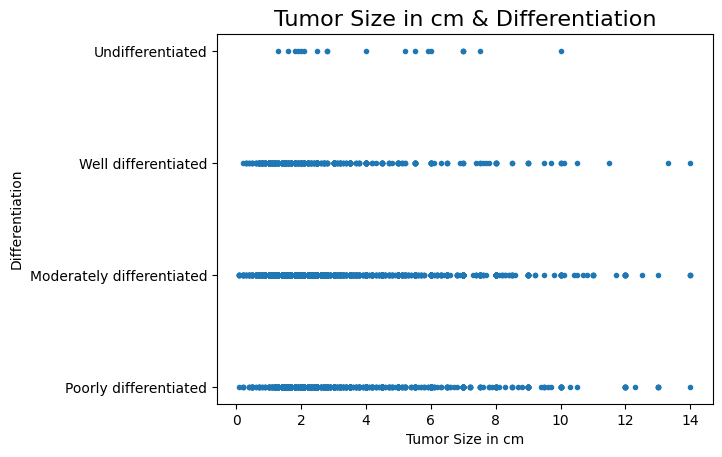

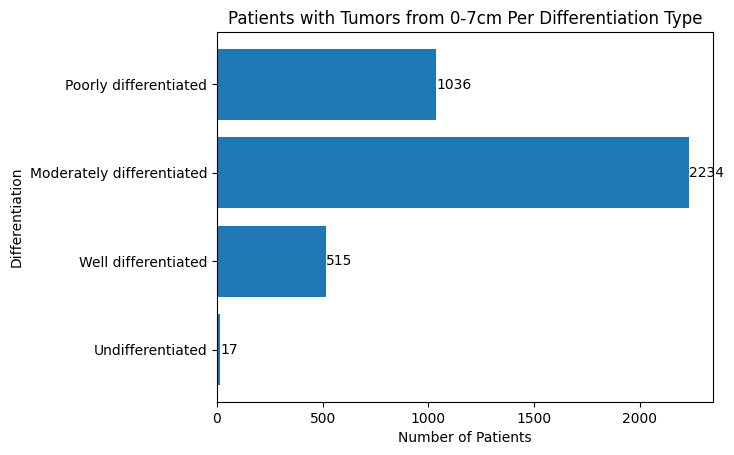

In [254]:
# Hypothesis 1.2

# Part A: Tumor Size in cm & Breast Cancer Differentiation

plt.scatter(bc_df['Tumor Size'],bc_df['differentiate'], marker=".")
plt.xlabel('Tumor Size in cm')
plt.ylabel('Differentiation')
plt.title("Tumor Size in cm & Differentiation", fontsize=16)
plt.show()

# Part B: Count per Differentiation Type for Tumors Sized 0-7 cm

bc_df_zeroseven = bc_df[bc_df['Tumor Size'] <= 7.0]

differentiation_types = ['Undifferentiated','Well differentiated','Moderately differentiated','Poorly differentiated']
differentiation_count = [bc_df_zeroseven['differentiate'].value_counts()['Undifferentiated'],bc_df_zeroseven['differentiate'].value_counts()['Well differentiated'],bc_df_zeroseven['differentiate'].value_counts()['Moderately differentiated'],bc_df_zeroseven['differentiate'].value_counts()['Poorly differentiated']]
plt.barh(differentiation_types, differentiation_count)
for i, value in enumerate(differentiation_count):
    plt.text(value, i, str(value), ha='left', va='center')
plt.title("Patients with Tumors from 0-7cm Per Differentiation Type")
plt.xlabel("Number of Patients")
plt.ylabel('Differentiation')
plt.show()

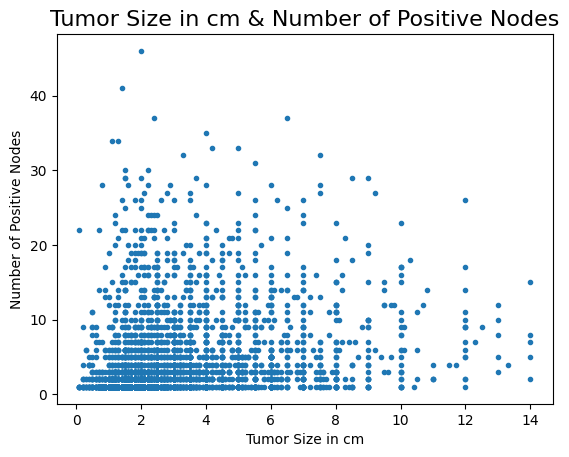

In [38]:
# Hypothesis 1.3

plt.scatter(bc_df['Tumor Size'],bc_df['Reginol Node Positive'], marker=".")
plt.xlabel('Tumor Size in cm')
plt.ylabel('Number of Positive Nodes')
plt.title("Tumor Size in cm & Number of Positive Nodes", fontsize=16)
plt.show()

In [138]:
# Hypothesis 2.1

survival_5yrs = bc_df[bc_df['Survival Years'] >= 5.00]
stage2_5yrs = survival_5yrs.loc[(survival_5yrs['6th Stage'] == "IIA") | (survival_5yrs['6th Stage'] == "IIB")]
print('The 5-year survival rate of patients with Stage 2 Breast Cancer is' + ' ' + str((stage2_5yrs['Status'].value_counts()['Alive'])/stage2_5yrs['Status'].count()))

stage3_5yrs = survival_5yrs.loc[(survival_5yrs['6th Stage'] == "IIIA") | (survival_5yrs['6th Stage'] == "IIIB") | (survival_5yrs['6th Stage'] == "IIIC")]
print(('The 5-year survival rate of patients with Stage 3 Breast Cancer is' + ' ' + str((stage3_5yrs['Status'].value_counts()['Alive'])/stage3_5yrs['Status'].count())))

The 5-year survival rate of patients with Stage 2 Breast Cancer is 0.9612794612794613
The 5-year survival rate of patients with Stage 3 Breast Cancer is 0.9056785370548605


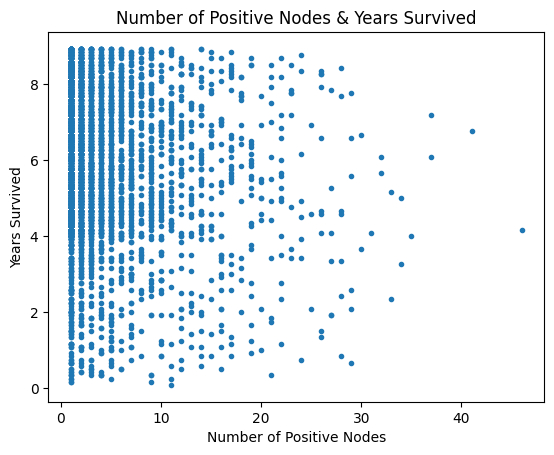

In [250]:
# Hypothesis 2.2

plt.scatter(bc_df['Reginol Node Positive'],bc_df['Survival Years'],marker=".")
plt.xlabel('Number of Positive Nodes')
plt.ylabel('Years Survived')
plt.title('Number of Positive Nodes & Years Survived')
plt.show()

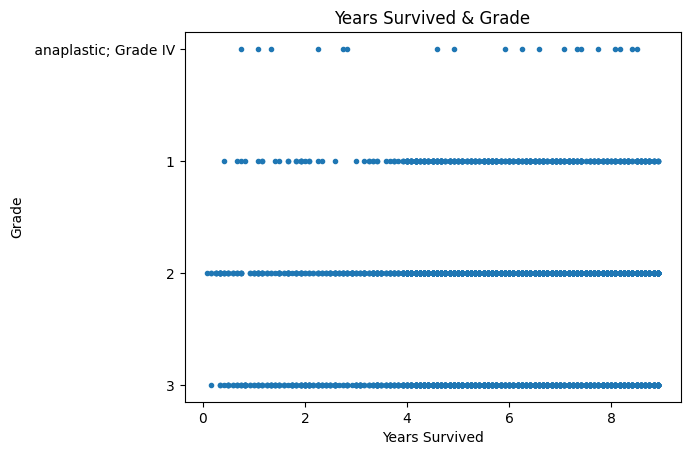

In [249]:
# Hypothesis 2.3

plt.scatter(bc_df['Survival Years'],bc_df['Grade'],marker=".")
plt.xlabel('Years Survived')
plt.ylabel('Grade')
plt.title('Years Survived & Grade')
plt.show()